# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
import os

In [2]:
# Surpress warnings:
import warnings


def warn(*args, **kwargs):
    pass


warnings.warn = warn

In [3]:
DATA_DIR = "data/"

In [4]:
car_df = pd.read_csv(os.path.join(DATA_DIR, "car_prices.csv"))

In [5]:
car_df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


# EDA (Exploratory Data Analysis)

In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [7]:
car_df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [8]:
car_df.describe(include='object')

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548536,548438,548186,545642,493485,558833,558837,558088,558088,558837,558825
unique,96,973,1963,87,4,550297,64,46,17,14263,3766
top,Ford,Altima,Base,Sedan,automatic,automatic,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475915,22,82945,110970,244329,19693,5334


In [9]:
car_df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

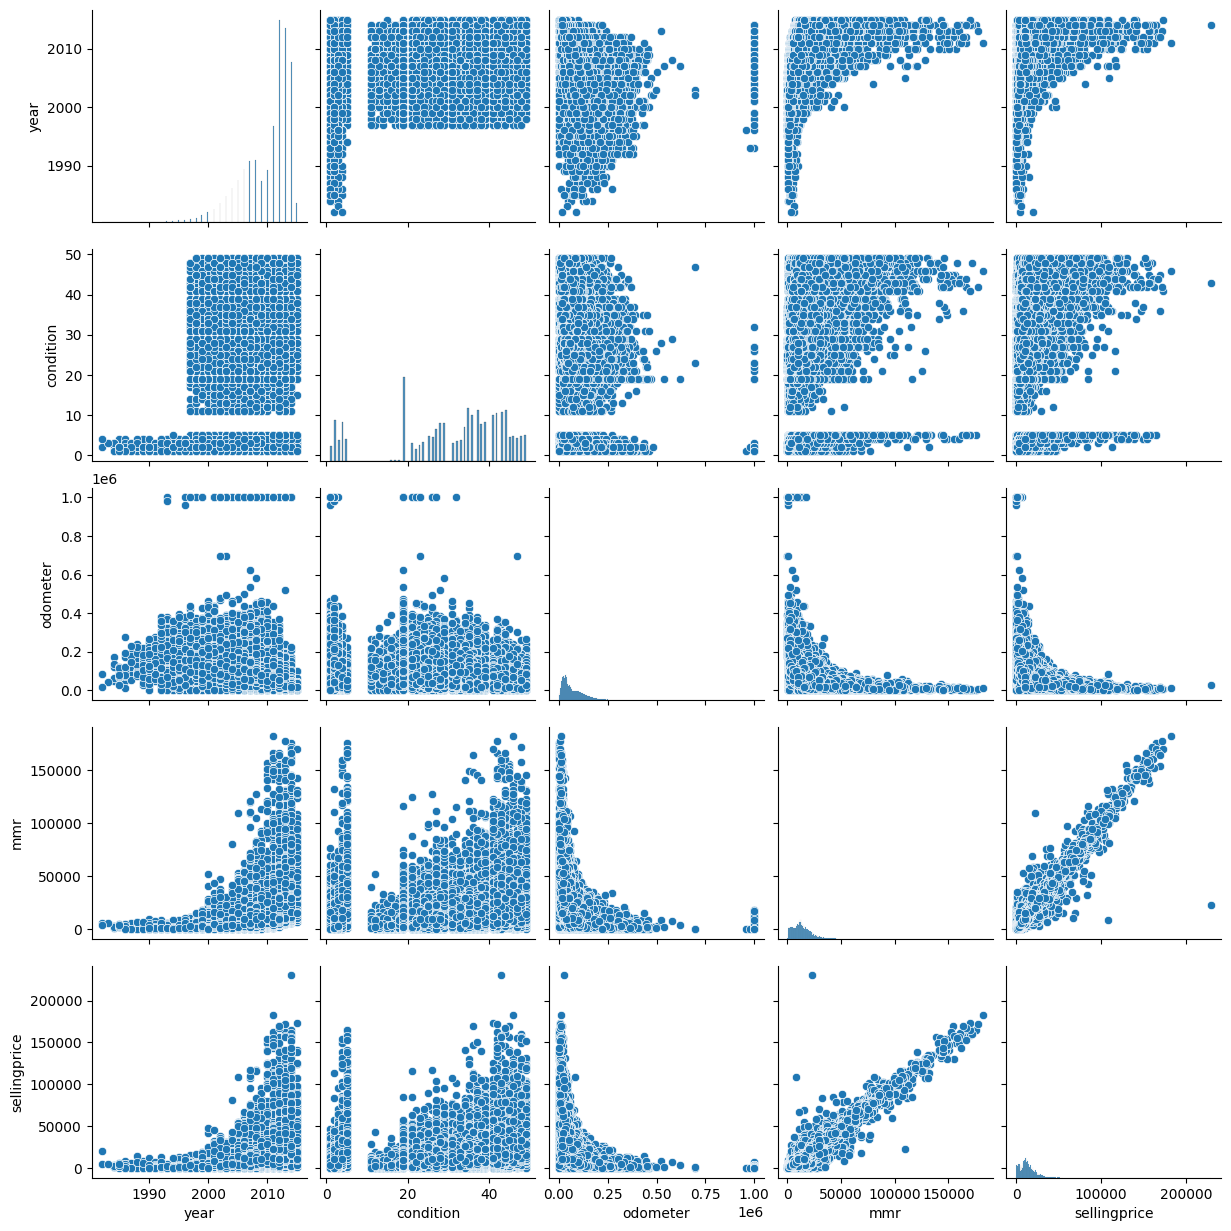

In [10]:
sns.pairplot(car_df)
plt.show()

# Preprocessing

In [11]:
car_df = car_df.dropna()
car_df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [12]:
def to_lower_case(x):
    return x.lower()

car_df['make'] = car_df['make'].apply(to_lower_case)
car_df['body'] = car_df['body'].apply(to_lower_case)
car_df['state'] = car_df['state'].apply(to_lower_case)
car_df['color'] = car_df['color'].apply(to_lower_case)
car_df['interior'] = car_df['interior'].apply(to_lower_case)

In [13]:
car_dropable_columns = [
    "vin",
    "seller",
    "saledate",
    "trim",
    "model",
    "interior",
    "color",
    "body",
    "state",
    "make",
    # "transmission",
    # "year",
    # "condition",
    # "mmr",
    # "odometer",
    # "sellingprice",
]

try:
    car_df = car_df.drop(columns=car_dropable_columns)
except:
    pass
car_df

,year,transmission,condition,odometer,mmr,sellingprice
0,2015,automatic,5.0,16639.0,20500.0,21500.0
1,2015,automatic,5.0,9393.0,20800.0,21500.0
2,2014,automatic,45.0,1331.0,31900.0,30000.0
3,2015,automatic,41.0,14282.0,27500.0,27750.0
4,2014,automatic,43.0,2641.0,66000.0,67000.0
...,...,...,...,...,...,...
558831,2011,automatic,39.0,66403.0,20300.0,22800.0
558833,2012,automatic,5.0,54393.0,30200.0,30800.0
558834,2012,automatic,48.0,50561.0,29800.0,34000.0
558835,2015,automatic,38.0,16658.0,15100.0,11100.0


In [14]:
car_object_columns = car_df.select_dtypes(include='object').columns
car_object_columns

Index(['transmission'], dtype='object')

In [15]:
for column in car_object_columns:
    label_encoder = LabelEncoder()
    car_df[column] = label_encoder.fit_transform(car_df[column])

car_df

,year,transmission,condition,odometer,mmr,sellingprice
0,2015,0,5.0,16639.0,20500.0,21500.0
1,2015,0,5.0,9393.0,20800.0,21500.0
2,2014,0,45.0,1331.0,31900.0,30000.0
3,2015,0,41.0,14282.0,27500.0,27750.0
4,2014,0,43.0,2641.0,66000.0,67000.0
...,...,...,...,...,...,...
558831,2011,0,39.0,66403.0,20300.0,22800.0
558833,2012,0,5.0,54393.0,30200.0,30800.0
558834,2012,0,48.0,50561.0,29800.0,34000.0
558835,2015,0,38.0,16658.0,15100.0,11100.0


# Model

In [16]:
X = car_df.values[:, :]
X = np.nan_to_num(X)
scaler = StandardScaler()
X = scaler.fit_transform(X)

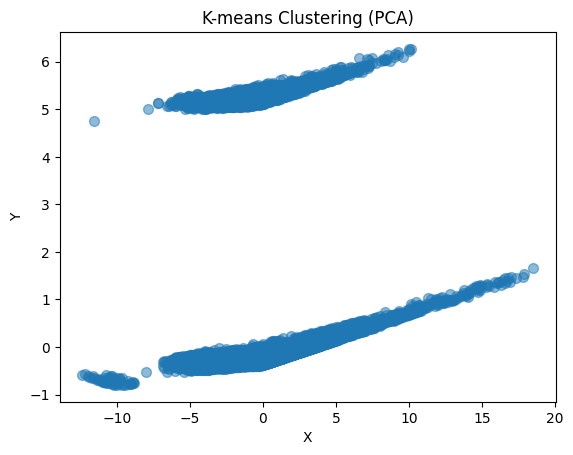

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1],s=50, alpha=0.5)

plt.title('K-means Clustering (PCA)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



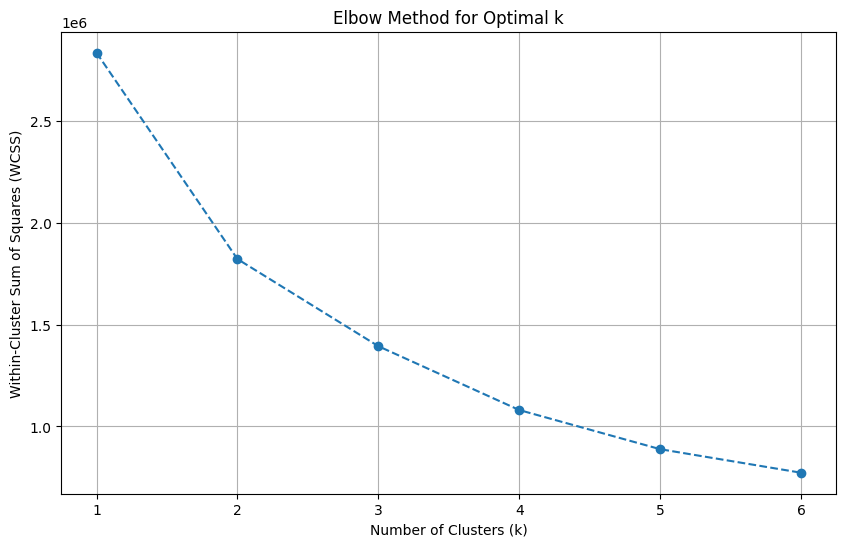

In [18]:
wcss = []
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 7), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 7))
plt.grid(True)
plt.show()

In [19]:
clusterNum = 3
k_means = KMeans(init="k-means++", n_clusters=clusterNum, n_init=12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 1 1 ... 1 1 1]


In [20]:
car_df["cluster"] = labels
car_df

,year,transmission,condition,odometer,mmr,sellingprice,cluster
0,2015,0,5.0,16639.0,20500.0,21500.0,1
1,2015,0,5.0,9393.0,20800.0,21500.0,1
2,2014,0,45.0,1331.0,31900.0,30000.0,1
3,2015,0,41.0,14282.0,27500.0,27750.0,1
4,2014,0,43.0,2641.0,66000.0,67000.0,1
...,...,...,...,...,...,...,...
558831,2011,0,39.0,66403.0,20300.0,22800.0,1
558833,2012,0,5.0,54393.0,30200.0,30800.0,1
558834,2012,0,48.0,50561.0,29800.0,34000.0,1
558835,2015,0,38.0,16658.0,15100.0,11100.0,1


In [21]:
car_df.groupby('cluster').mean()

,year,transmission,condition,odometer,mmr,sellingprice
cluster,,,,,,
0,2006.018298,0.000006,23.868481,121839.843431,5754.586776,5541.596611
1,2012.454104,0.000000,34.384704,38012.788754,18091.994221,17987.016683
2,2008.407066,1.000000,29.353157,75483.398998,11636.489212,11350.341666


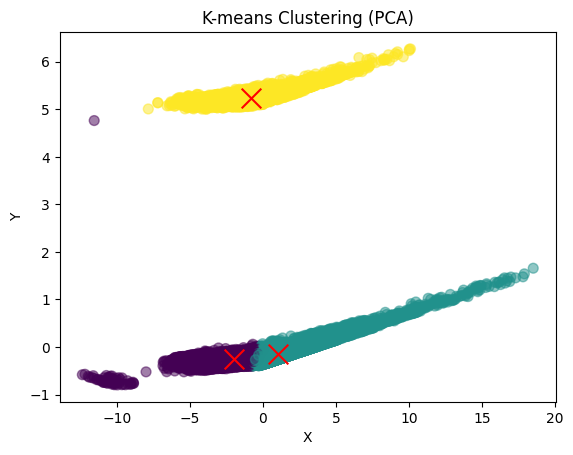

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels,
            cmap='viridis', s=50, alpha=0.5)

centroids_pca = pca.transform(k_means.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            c='red', marker='x', s=200)

plt.title('K-means Clustering (PCA)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

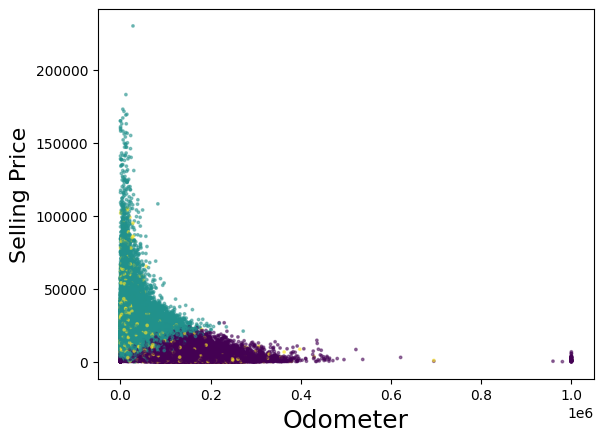

In [23]:
area = np.pi
plt.scatter(car_df.loc[:, ["odometer"]], car_df.loc[:, ["sellingprice"]], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Odometer', fontsize=18)
plt.ylabel('Selling Price', fontsize=16)

plt.show()

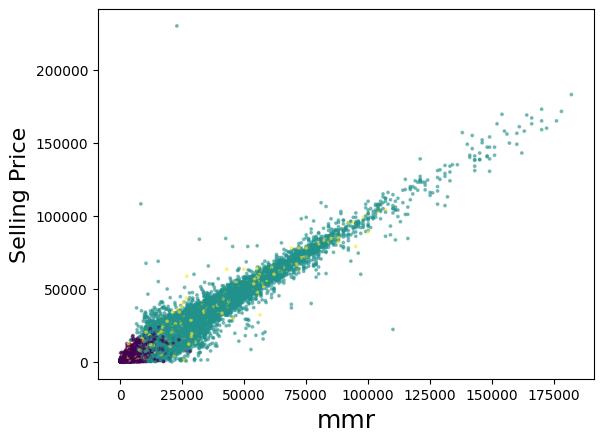

In [24]:
area = np.pi
plt.scatter(car_df.loc[:, ["mmr"]], car_df.loc[:, [
            "sellingprice"]], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('mmr', fontsize=18)
plt.ylabel('Selling Price', fontsize=16)

plt.show()

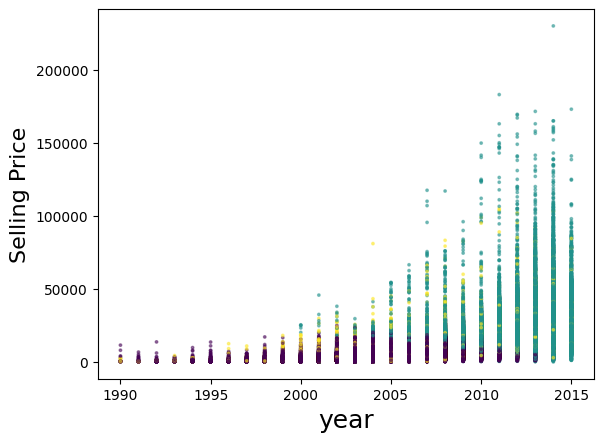

In [25]:
area = np.pi
plt.scatter(car_df.loc[:, ["year"]], car_df.loc[:, [
            "sellingprice"]], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('year', fontsize=18)
plt.ylabel('Selling Price', fontsize=16)

plt.show()

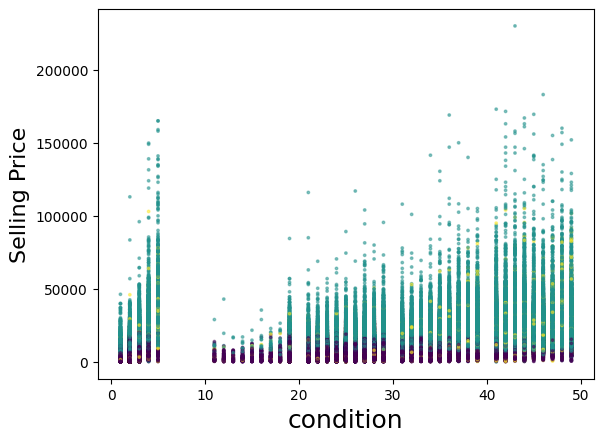

In [26]:
area = np.pi
plt.scatter(car_df.loc[:, ["condition"]], car_df.loc[:, [
            "sellingprice"]], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('condition', fontsize=18)
plt.ylabel('Selling Price', fontsize=16)

plt.show()

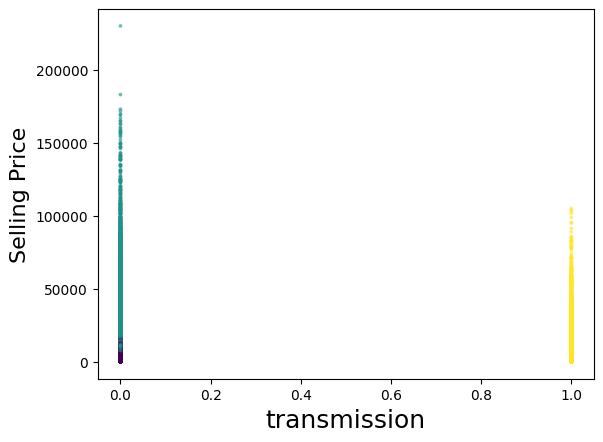

In [27]:
area = np.pi
plt.scatter(car_df.loc[:, ["transmission"]], car_df.loc[:, [
            "sellingprice"]], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('transmission', fontsize=18)
plt.ylabel('Selling Price', fontsize=16)

plt.show()

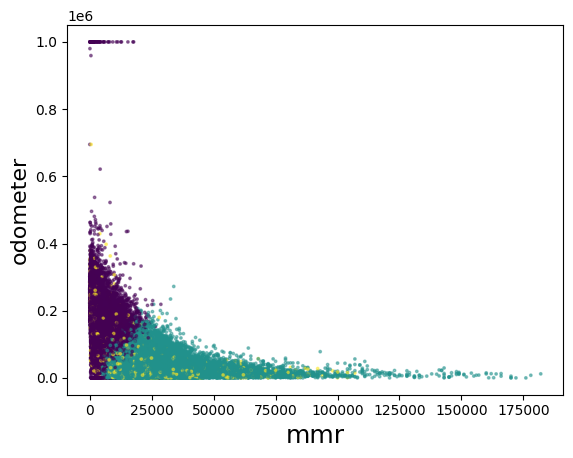

In [28]:
area = np.pi
plt.scatter(car_df.loc[:, ["mmr"]], car_df.loc[:, [
            "odometer"]], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('mmr', fontsize=18)
plt.ylabel('odometer', fontsize=16)

plt.show()

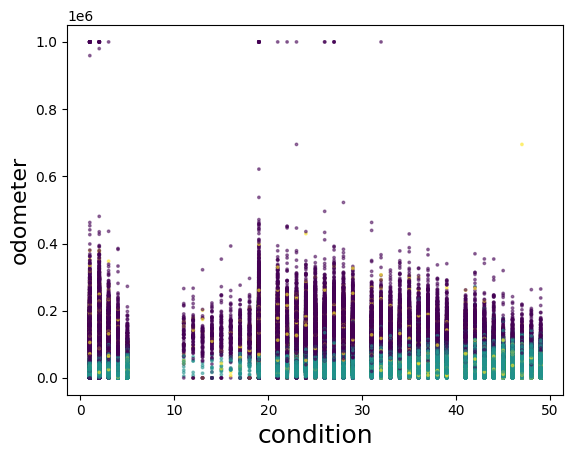

In [29]:
area = np.pi
plt.scatter(car_df.loc[:, ["condition"]], car_df.loc[:, [
            "odometer"]], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('condition', fontsize=18)
plt.ylabel('odometer', fontsize=16)

plt.show()

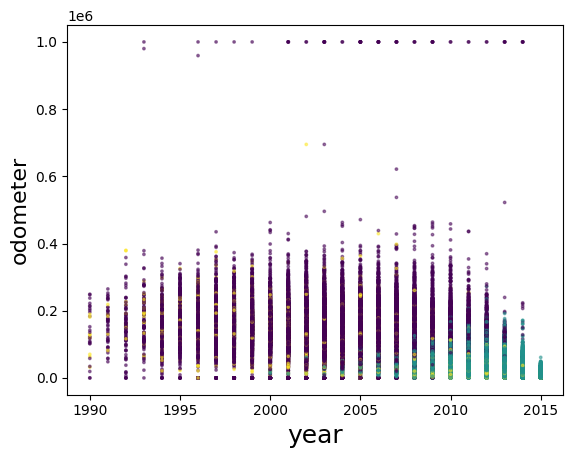

In [30]:
area = np.pi
plt.scatter(car_df.loc[:, ["year"]], car_df.loc[:, [
            "odometer"]], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('year', fontsize=18)
plt.ylabel('odometer', fontsize=16)

plt.show()

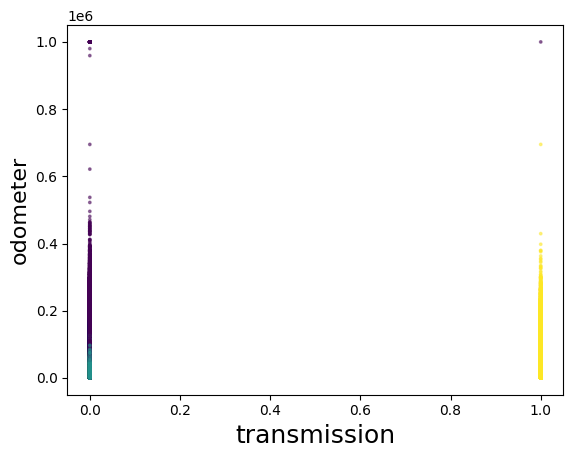

In [31]:
area = np.pi
plt.scatter(car_df.loc[:, ["transmission"]], car_df.loc[:, [
            "odometer"]], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('transmission', fontsize=18)
plt.ylabel('odometer', fontsize=16)

plt.show()

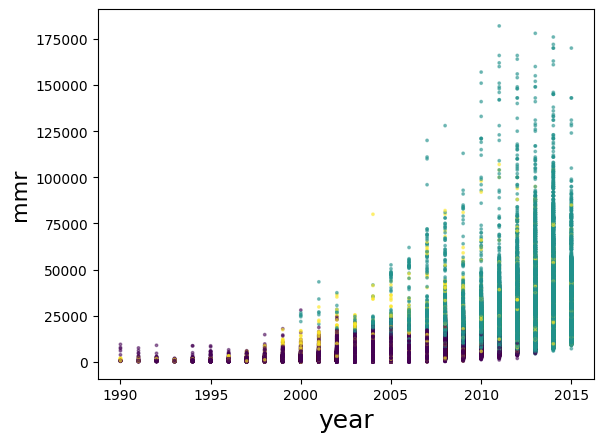

In [32]:
area = np.pi
plt.scatter(car_df.loc[:, ["year"]], car_df.loc[:, [
            "mmr"]], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('year', fontsize=18)
plt.ylabel('mmr', fontsize=16)

plt.show()

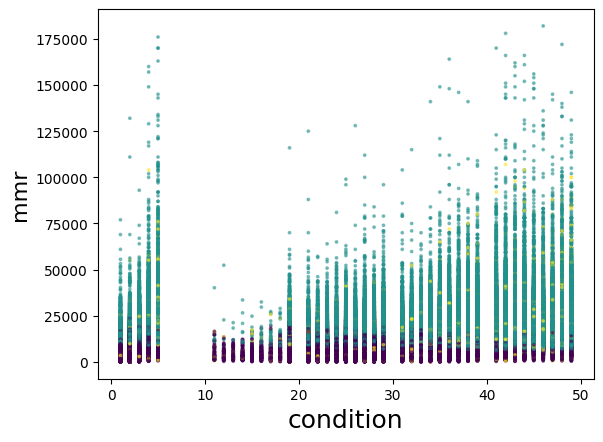

In [33]:
area = np.pi
plt.scatter(car_df.loc[:, ["condition"]], car_df.loc[:, [
            "mmr"]], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('condition', fontsize=18)
plt.ylabel('mmr', fontsize=16)

plt.show()

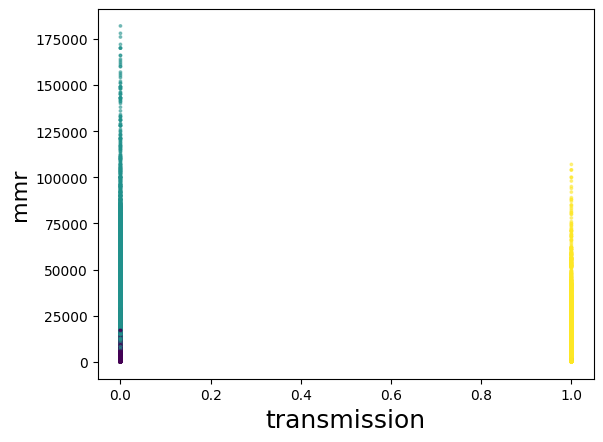

In [34]:
area = np.pi
plt.scatter(car_df.loc[:, ["transmission"]], car_df.loc[:, [
            "mmr"]], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('transmission', fontsize=18)
plt.ylabel('mmr', fontsize=16)

plt.show()

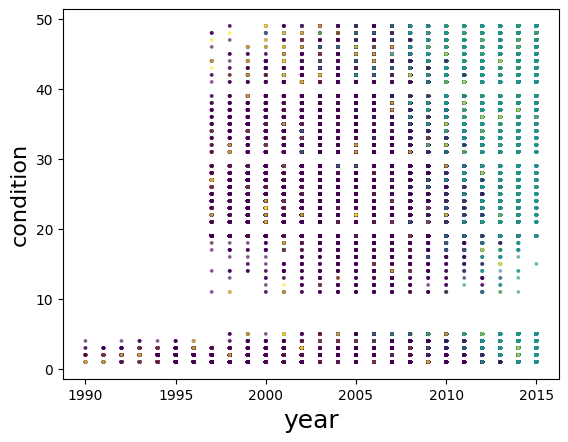

In [35]:
area = np.pi
plt.scatter(car_df.loc[:, ["year"]], car_df.loc[:, [
            "condition"]], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('year', fontsize=18)
plt.ylabel('condition', fontsize=16)

plt.show()

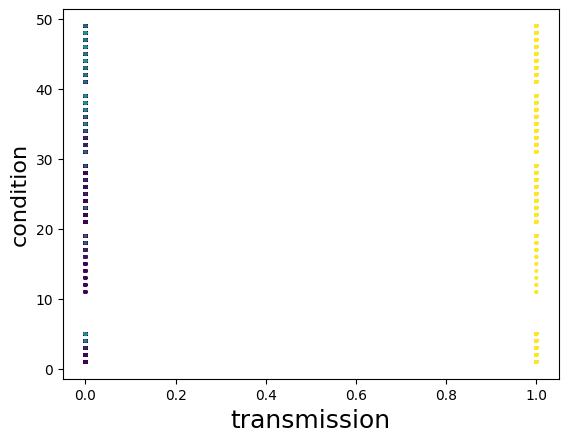

In [36]:
area = np.pi
plt.scatter(car_df.loc[:, ["transmission"]], car_df.loc[:, [
            "condition"]], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('transmission', fontsize=18)
plt.ylabel('condition', fontsize=16)

plt.show()

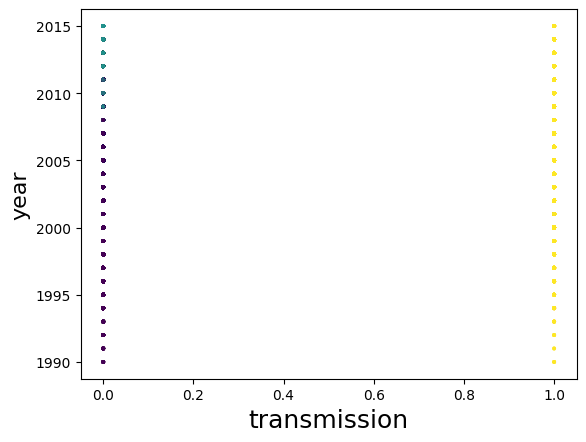

In [37]:
area = np.pi
plt.scatter(car_df.loc[:, ["transmission"]], car_df.loc[:, [
            "year"]], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('transmission', fontsize=18)
plt.ylabel('year', fontsize=16)

plt.show()